In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

plt.rcParams['svg.fonttype'] = 'none'

import fractionalcontribution as fc

In [2]:
plasmadata = "/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/flux/sepsis_fluxomics/Plasma_summary.xlsx"
tissuedata = "/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/flux/sepsis_fluxomics/Tissue_summary.xlsx"

plasmapoolsize = pd.read_excel(plasmadata, sheet_name=3, header=0)
plasmanormalizedlabeling = pd.read_excel(plasmadata, sheet_name=2, header=0)

tissuepoolsize = pd.read_excel(tissuedata, sheet_name=3, header=0)
tissuenormalizedlabeling = pd.read_excel(tissuedata, sheet_name=2, header=0)

In [3]:
#Create dataframe with only 13C and no 2H for certain compounds

plasmanormalizedlabeling['combined_label'] = "13C_" + plasmanormalizedlabeling['13C#'].astype(str) + "_2H_" + plasmanormalizedlabeling['2H#'].astype(str)

tissuenormalizedlabeling['combined_label'] = "13C_" + tissuenormalizedlabeling['13C#'].astype(str) + "_2H_" + tissuenormalizedlabeling['2H#'].astype(str)

In [4]:
#Convert float to INT to do math on dataframe
tissuepoolsize1 = tissuepoolsize.set_index('Compound')
tissuepoolsize = tissuepoolsize1.astype(int)

plasmapoolsize1 = plasmapoolsize.set_index('Compound')
plasmapoolsize = plasmapoolsize1.astype(int)

In [5]:
#Pandas automatically does this normalization on a per column basis

#Sample Normalization with fraction of sum of total peak area
tissuepoolsize_nml = tissuepoolsize / tissuepoolsize.sum()
plasmapoolsize_nml = plasmapoolsize / plasmapoolsize.sum()

#Feature Normalization with log transform
tissuepoolsize_nml = np.log2(tissuepoolsize_nml)

#Transpose the dataframe to add info regarding exercise status
tissuepoolsize_nml_t = tissuepoolsize_nml.transpose()

In [6]:
tissuepoolsize_nml_t

Compound,glutamate,Glucose,hexose-phosphate,fructose-1-6-bisphosphate,3-phosphoglycerate,phosphoenolpyruvate,pyruvate,lactate,6-phosphogluconate,6-phosphogluconolactone,...,proline,glutathione disulfide (GSSG),Acetyl-CoA,UDP-D-glucose,ADP,ATP,AMP,NAD,NADH,NADP
1_eWAT,-5.107918,-7.108709,-6.979573,-8.935329,-8.622917,-13.617994,-4.222747,-4.477737,-10.220057,-9.504141,...,-6.544870,-8.798100,-8.611244,-7.583870,-7.856544,-9.528154,-4.843795,-9.197963,-13.266731,-11.137242
1_Heart,-5.303436,-7.759431,-6.397758,-9.532495,-8.811056,-13.983879,-8.026467,-3.477603,-12.372755,-9.698341,...,-7.819317,-11.810674,-9.228698,-9.879957,-7.148082,-9.121744,-4.693284,-6.776655,-12.875732,-12.311867
1_Kidney,-4.874140,-7.010204,-8.508614,-6.609478,-8.826112,-14.451758,-7.863624,-4.457286,-10.285819,-11.041505,...,-7.840791,-11.533331,-8.410587,-7.661797,-8.366679,-10.975711,-3.829112,-7.086943,-12.009160,-11.384391
1_Liver,-5.400572,-7.078862,-9.615806,-8.406888,-8.183657,-14.694076,-8.565067,-5.383782,-10.657706,-12.319453,...,-7.396882,-10.711391,-8.926160,-7.271441,-8.815170,-11.518236,-3.880843,-7.151079,-13.076796,-10.955874
1_Lung,-5.171015,-7.272849,-9.136413,-6.264763,-8.977835,-14.779784,-6.327285,-4.468134,-10.966742,-11.497048,...,-7.466537,-10.543245,-9.561254,-8.910655,-8.724971,-11.854509,-4.980920,-8.394572,-14.391283,-11.926527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16_Kidney,-5.093394,-6.661413,-8.956770,-6.669197,-7.261384,-14.277637,-8.145838,-4.009723,-10.767883,-10.904903,...,-7.552820,-11.295772,-9.636832,-8.069449,-8.368330,-10.988824,-4.114797,-6.962418,-11.079415,-11.251269
16_Liver,-6.802250,-3.993055,-5.601578,-7.567033,-9.270916,-13.116620,-8.399208,-3.358747,-11.727353,-8.844590,...,-6.374895,-12.589187,-8.124473,-7.672221,-7.386286,-9.695596,-5.466483,-7.247382,-12.480239,-11.518805
16_Lung,-5.415468,-6.529253,-8.848012,-6.438391,-8.163427,-14.743878,-9.093560,-3.848155,-11.368968,-11.438099,...,-7.655504,-10.345000,-10.209132,-8.652778,-9.291270,-11.999090,-4.620438,-9.615427,-15.513372,-11.630460
16_Quad,-7.094371,-8.058298,-4.035936,-6.878145,-8.473048,-13.033014,-5.769586,-3.776334,-10.659694,-7.354356,...,-5.605456,-11.074653,-9.284009,-10.680394,-7.406857,-4.923757,-9.898605,-7.220324,-11.322345,-10.728101


In [6]:
#Add a column that gives each mouse's exercise vs sedentary condition
tissuepoolsize_nml_t["Condition"] = 'test'
tissuepoolsize_nml_t["Condition"][tissuepoolsize_nml_t.index.str.contains('1|3|5|7|9|11|13|15')] = "Sepsis"
tissuepoolsize_nml_t["Condition"][tissuepoolsize_nml_t.index.str.contains('2|4|6|8|10|12|14|16')] = "Sham"

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_80016/1094772515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tissuepoolsize_nml_t["Condition"][tissuepoolsize_nml_t.index.str.contains('1|3|5|7|9|11|13|15')] = "Sepsis"
/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_80016/1094772515.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tissuepoolsize_nml_t["Condition"][tissuepoolsize_nml_t.index.str.contains('2|4|6|8|10|12|14|16')] = "Sham"


In [7]:
condition = tissuepoolsize_nml_t.pop('Condition')

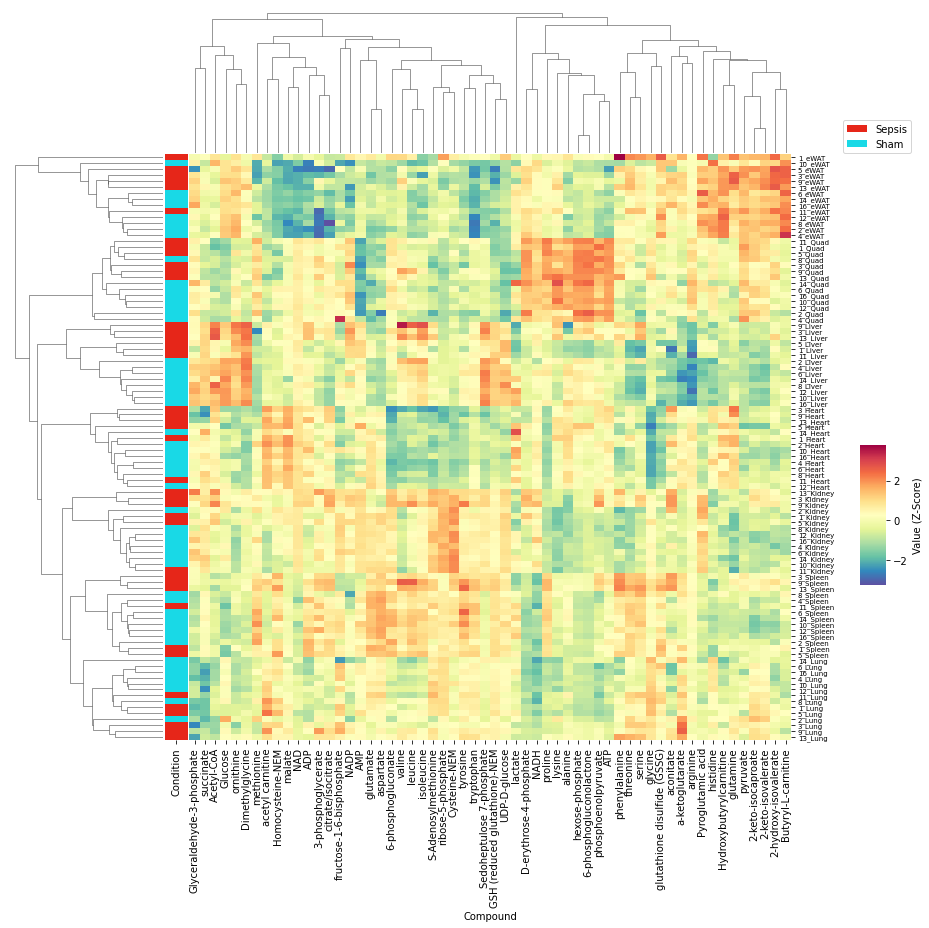

In [8]:
lut = dict(zip(condition.unique(), sns.hls_palette(len(set(condition)), l=0.5, s=0.8)))
row_colors = condition.map(lut)

g = sns.clustermap(tissuepoolsize_nml_t, z_score=1, figsize=(12, 13),
                   cbar_pos=(1.0, 0.37, .03, 0.15),
                   cbar_kws={"label" : "Value (Z-Score)"},
                   row_colors=row_colors, 
                   cmap='Spectral_r', #linewidth=0.003,
                   yticklabels=True,
                   xticklabels=True)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 7)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 10)
for label in condition.unique():
    g.ax_col_dendrogram.bar(0, 0, color=lut[label],
                            label=label, 
                            linewidth=0)
g.ax_col_dendrogram.legend(bbox_to_anchor=(1.2, 0), loc='lower right', borderaxespad=0, ncol=1)

#g.savefig('/Users/brooksleitner/Desktop/Python/sepsismetabolism/figures/metabolomics/all_tissues_metabolomics.svg', bbox_inches="tight", dpi=300)

# Create Dataframe for Fractional Contributions to which we can append all tissues metabolites with the desired isotopologue for 13C label incorporation

Create a dictionary for the specific isotopologue for each molecule

In [7]:
tissue_isotopologues = {'glutamate': '13C_5_2H_0', 'GSH': '13C_5_2H_0', 'pyroglutamic acid': '13C_5_2H_0', 'a-ketoglutarate': '13C_5_2H_0', 'succinate': '13C_4_2H_0', 'malate': '13C_4_2H_0', 'citrate_ox': '13C_4_2H_0', 'citrate_red': '13C_5_2H_0', 'pyruvate': '13C_3_2H_0', 'aconitate_red': '13C_5_2H_0', 'aconitate_ox': '13C_4_2H_0'}

Initialize a dataframe with fully labeled plasma glutamine enrichment, as this will be the first portion of all dataframes for each tissue

In [10]:
glutamine_normalized_plasma = plasmanormalizedlabeling[plasmanormalizedlabeling['Compound'] == 'glutamine']

glutamine_13C5_H0 = glutamine_normalized_plasma[glutamine_normalized_plasma['combined_label'] == '13C_5_2H_0']

fractional_contribution_summary_df = pd.melt(glutamine_13C5_H0.drop(['13C#', '2H#'], axis=1), id_vars=['Compound', 'combined_label'], var_name= 'Mouse', value_name='plasma_glutamine_m5_APE')

fractional_contribution_summary_df = fractional_contribution_summary_df.drop(['Compound', 'combined_label'], axis=1)

fractional_contribution_summary_df = fractional_contribution_summary_df[fractional_contribution_summary_df['Mouse'].str.contains('120')]

mouse_conditions = ['Sepsis', 'Sham', 'Sepsis', 'Sham', 'Sepsis', 'Sham', 'Sham', 'Sepsis', 'Sham', 'Sepsis', 'Sham', 'Sepsis', 'Sham', 'Sham']

fractional_contribution_summary_df['Condition'] = mouse_conditions

fractional_contribution_summary_df

,Mouse,plasma_glutamine_m5_APE
1,1_120,0.097885
3,2_120,0.187598
5,3_120,0.214530
7,4_120,0.101862
9,5_120,0.121081
11,6_120,0.090018
13,8_120,0.098388
15,9_120,0.224752
17,10_120,0.133398
19,11_120,0.111641


In [39]:
fractional_contribution_summary_df

,Mouse,plasma_glutamine_m5_APE,Condition
1,1_120,0.097885,Sepsis
3,2_120,0.187598,Sham
5,3_120,0.214530,Sepsis
7,4_120,0.101862,Sham
9,5_120,0.121081,Sepsis
11,6_120,0.090018,Sham
13,8_120,0.098388,Sham
15,9_120,0.224752,Sepsis
17,10_120,0.133398,Sham
19,11_120,0.111641,Sepsis


Pull the metabolites with the specific isotopologue for each metabolite-isotopologue pair and assemble into filtered dataframe

In [12]:
tissuenormalizedlabeling

,Compound,13C#,2H#,1_eWAT,1_Heart,1_Kidney,1_Liver,1_Lung,1_Quad,1_Spleen,...,14_Lung,14_Quad,14_Spleen,16_eWAT,16_Heart,16_Kidney,16_Liver,16_Lung,16_Quad,16_Spleen
0,glutamate,0,0,9.620313e-01,0.994368,0.940421,0.944787,0.977036,0.985272,0.970960,...,9.844037e-01,9.835409e-01,0.957411,9.579301e-01,0.992153,0.956968,0.940412,0.961508,9.786210e-01,0.952126
1,glutamate,1,0,6.943461e-03,0.000000,0.003554,0.000000,0.000949,0.003644,0.003984,...,2.738462e-03,0.000000e+00,0.013442,1.121335e-02,0.001251,0.005449,0.005124,0.010030,1.432656e-03,0.012608
2,glutamate,2,0,3.378975e-03,0.000136,0.002752,0.003801,0.002961,0.001820,0.003646,...,3.017784e-03,1.426305e-03,0.005296,1.682492e-03,0.001726,0.002721,0.002874,0.002756,2.297262e-03,0.004493
3,glutamate,3,0,5.743620e-03,0.001212,0.004369,0.005525,0.004621,0.003249,0.007764,...,4.434607e-03,1.977466e-03,0.010700,6.652747e-03,0.000506,0.004102,0.004737,0.004965,3.753956e-03,0.011130
4,glutamate,4,0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,Dimethylglycine,3,9,0.000000e+00,0.000000,0.000398,0.000043,0.000000,0.001254,0.000549,...,0.000000e+00,8.788304e-09,0.001741,0.000000e+00,0.000248,0.000481,0.000067,0.000954,0.000000e+00,0.000647
3537,Dimethylglycine,4,9,8.220474e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.380390e-08,0.000000e+00,0.000000,4.337732e-08,0.000000,0.000000,0.000000,0.000000,4.172142e-09,0.000000
3538,proline,0,0,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
3539,proline,1,0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000


glutamate (1/11)

In [15]:
glutamate_normalized_tissue = tissuenormalizedlabeling[tissuenormalizedlabeling['Compound'] == 'glutamate']

glutamate_13C5_H0 = glutamate_normalized_tissue[glutamate_normalized_tissue['combined_label'] == '13C_5_2H_0']

glutamate_13C5_H0

,Compound,13C#,2H#,1_eWAT,1_Heart,1_Kidney,1_Liver,1_Lung,1_Quad,1_Spleen,...,14_Quad,14_Spleen,16_eWAT,16_Heart,16_Kidney,16_Liver,16_Lung,16_Quad,16_Spleen,combined_label
5,glutamate,5,0,0.021466,0.00408,0.048575,0.045513,0.013857,0.005917,0.013183,...,0.010989,0.012733,0.019024,0.002549,0.029993,0.046518,0.018519,0.013029,0.019084,13C_5_2H_0


Glutathione (GSH) (2/11)

In [17]:
glutathione_normalized_tissue = tissuenormalizedlabeling[tissuenormalizedlabeling['Compound'] == 'GSH (reduced glutathione)-NEM']

glutathione_13C5_H0 = glutathione_normalized_tissue[glutathione_normalized_tissue['combined_label'] == '13C_5_2H_0']

glutathione_13C5_H0

,Compound,13C#,2H#,1_eWAT,1_Heart,1_Kidney,1_Liver,1_Lung,1_Quad,1_Spleen,...,14_Quad,14_Spleen,16_eWAT,16_Heart,16_Kidney,16_Liver,16_Lung,16_Quad,16_Spleen,combined_label
1801,GSH (reduced glutathione)-NEM,5,0,0.000844,0.000638,0.008648,0.016517,0.000254,0.000182,0.000712,...,0.000232,0.001571,0.000909,0.000151,0.005111,0.009667,0.000492,0.000523,0.00136,13C_5_2H_0


Pyroglutamic Acid (5-Oxoproline) (3/11)

In [18]:
pyroglutamic_acid_normalized_tissue = tissuenormalizedlabeling[tissuenormalizedlabeling['Compound'] == 'Pyroglutamic acid']

pyroglutamic_acid_13C5_H0 = pyroglutamic_acid_normalized_tissue[pyroglutamic_acid_normalized_tissue['combined_label'] == '13C_5_2H_0']

pyroglutamic_acid_13C5_H0

,Compound,13C#,2H#,1_eWAT,1_Heart,1_Kidney,1_Liver,1_Lung,1_Quad,1_Spleen,...,14_Quad,14_Spleen,16_eWAT,16_Heart,16_Kidney,16_Liver,16_Lung,16_Quad,16_Spleen,combined_label
793,Pyroglutamic acid,5,0,0.030813,0.185256,0.045097,0.052291,0.175846,0.019365,0.06199,...,0.018807,0.014816,0.053904,0.170246,0.029755,0.036975,0.246438,0.02297,0.06067,13C_5_2H_0


Alpha-Ketoglutarate (4/11)

In [19]:
a_ketoglutarate_normalized_tissue = tissuenormalizedlabeling[tissuenormalizedlabeling['Compound'] == 'a-ketoglutarate']

a_ketoglutarate_13C5_H0 = a_ketoglutarate_normalized_tissue[a_ketoglutarate_normalized_tissue['combined_label'] == '13C_5_2H_0']

a_ketoglutarate_13C5_H0

,Compound,13C#,2H#,1_eWAT,1_Heart,1_Kidney,1_Liver,1_Lung,1_Quad,1_Spleen,...,14_Quad,14_Spleen,16_eWAT,16_Heart,16_Kidney,16_Liver,16_Lung,16_Quad,16_Spleen,combined_label
958,a-ketoglutarate,5,0,0.012645,0.00401,0.04085,0.036632,0.012687,0.003938,0.017006,...,0.009682,0.01116,0.009548,0.002322,0.024425,0.023549,0.011269,0.011675,0.018158,13C_5_2H_0


Succinate (5/11)

In [26]:
succinate_normalized_tissue = tissuenormalizedlabeling[tissuenormalizedlabeling['Compound'] == 'succinate']

succinate_13C4_H0 = succinate_normalized_tissue[succinate_normalized_tissue['combined_label'] == '13C_4_2H_0']

succinate_13C4_H0

,Compound,13C#,2H#,1_eWAT,1_Heart,1_Kidney,1_Liver,1_Lung,1_Quad,1_Spleen,...,14_Quad,14_Spleen,16_eWAT,16_Heart,16_Kidney,16_Liver,16_Lung,16_Quad,16_Spleen,combined_label
828,succinate,4,0,0.01407,0.00051,0.012719,0.012704,0.016428,0.004494,0.013043,...,0.004266,0.011822,0.011905,0.000564,0.006127,0.017449,0.017308,0.007184,0.016222,13C_4_2H_0


Malate (6/11)

In [27]:
malate_normalized_tissue = tissuenormalizedlabeling[tissuenormalizedlabeling['Compound'] == 'malate']

malate_13C4_H0 = malate_normalized_tissue[malate_normalized_tissue['combined_label'] == '13C_4_2H_0']

malate_13C4_H0

,Compound,13C#,2H#,1_eWAT,1_Heart,1_Kidney,1_Liver,1_Lung,1_Quad,1_Spleen,...,14_Quad,14_Spleen,16_eWAT,16_Heart,16_Kidney,16_Liver,16_Lung,16_Quad,16_Spleen,combined_label
857,malate,4,0,0.008658,0.000379,0.006793,0.010912,0.005793,0.002782,0.011217,...,0.002357,0.015704,0.00988,0.000519,0.005518,0.013126,0.006916,0.003602,0.014267,13C_4_2H_0


Citrate/Isocitrate, Reductive Carboxylation (7/11)

In [28]:
citrate_normalized_tissue = tissuenormalizedlabeling[tissuenormalizedlabeling['Compound'] == 'citrate/isocitrate']

citrate_13C5_H0 = citrate_normalized_tissue[citrate_normalized_tissue['combined_label'] == '13C_5_2H_0']

citrate_13C5_H0

,Compound,13C#,2H#,1_eWAT,1_Heart,1_Kidney,1_Liver,1_Lung,1_Quad,1_Spleen,...,14_Quad,14_Spleen,16_eWAT,16_Heart,16_Kidney,16_Liver,16_Lung,16_Quad,16_Spleen,combined_label
1103,citrate/isocitrate,5,0,0.002052,0.000806,0.005525,0.004527,0.002965,0.001475,0.001661,...,0.001068,0.000757,0.001336,0.00037,0.003511,0.006646,0.00148,0.002189,0.001813,13C_5_2H_0


Citrate/Isocitrate, Oxidative Carboxylation (8/11)

In [29]:
citrate_normalized_tissue = tissuenormalizedlabeling[tissuenormalizedlabeling['Compound'] == 'citrate/isocitrate']

citrate_13C4_H0 = citrate_normalized_tissue[citrate_normalized_tissue['combined_label'] == '13C_4_2H_0']

citrate_13C4_H0

,Compound,13C#,2H#,1_eWAT,1_Heart,1_Kidney,1_Liver,1_Lung,1_Quad,1_Spleen,...,14_Quad,14_Spleen,16_eWAT,16_Heart,16_Kidney,16_Liver,16_Lung,16_Quad,16_Spleen,combined_label
1102,citrate/isocitrate,4,0,0.006046,0.001053,0.001502,0.00284,0.002461,0.002955,0.006073,...,0.002336,0.007818,0.005098,0.001065,0.004274,0.004195,0.00465,0.003627,0.008619,13C_4_2H_0


Aconitate, Reductive Carboxylation (9/11)

In [30]:
aconitate_normalized_tissue = tissuenormalizedlabeling[tissuenormalizedlabeling['Compound'] == 'aconitate']

aconitate_13C5_H0 = aconitate_normalized_tissue[aconitate_normalized_tissue['combined_label'] == '13C_5_2H_0']

aconitate_13C5_H0

,Compound,13C#,2H#,1_eWAT,1_Heart,1_Kidney,1_Liver,1_Lung,1_Quad,1_Spleen,...,14_Quad,14_Spleen,16_eWAT,16_Heart,16_Kidney,16_Liver,16_Lung,16_Quad,16_Spleen,combined_label
1061,aconitate,5,0,0.001517,0.000828,0.003525,0.003328,0.000957,0.000544,0.001372,...,0.00133,0.000072,0.000992,0.0009,0.001513,0.001734,0.002646,0.000926,0.002614,13C_5_2H_0


Aconitate, Oxidative Carboxylation (10/11)

In [31]:
aconitate_normalized_tissue = tissuenormalizedlabeling[tissuenormalizedlabeling['Compound'] == 'aconitate']

aconitate_13C4_H0 = aconitate_normalized_tissue[aconitate_normalized_tissue['combined_label'] == '13C_4_2H_0']

aconitate_13C4_H0

,Compound,13C#,2H#,1_eWAT,1_Heart,1_Kidney,1_Liver,1_Lung,1_Quad,1_Spleen,...,14_Quad,14_Spleen,16_eWAT,16_Heart,16_Kidney,16_Liver,16_Lung,16_Quad,16_Spleen,combined_label
1060,aconitate,4,0,0.004532,0.000286,0.001702,0.003242,0.004262,0.0,0.003719,...,0.002701,0.006467,0.002411,0.000519,0.001008,0.003,0.001863,0.003409,0.009591,13C_4_2H_0


Pyruvate, from Malic Enzyme (11/11)

In [32]:
pyruvate_normalized_tissue = tissuenormalizedlabeling[tissuenormalizedlabeling['Compound'] == 'pyruvate']

pyruvate_13C3_H0 = pyruvate_normalized_tissue[pyruvate_normalized_tissue['combined_label'] == '13C_3_2H_0']

pyruvate_13C3_H0

,Compound,13C#,2H#,1_eWAT,1_Heart,1_Kidney,1_Liver,1_Lung,1_Quad,1_Spleen,...,14_Quad,14_Spleen,16_eWAT,16_Heart,16_Kidney,16_Liver,16_Lung,16_Quad,16_Spleen,combined_label
335,pyruvate,3,0,0.003076,0.000799,0.003451,0.008195,0.003065,0.001587,0.004988,...,0.001356,0.0,0.001777,0.0,0.007583,0.001871,0.0,0.0009,0.002224,13C_3_2H_0


Combine all dataframes with key metabolites and isotopologues

In [35]:
targeted_isotopologues = pd.concat([glutamate_13C5_H0, glutathione_13C5_H0, pyroglutamic_acid_13C5_H0, a_ketoglutarate_13C5_H0, succinate_13C4_H0, malate_13C4_H0, citrate_13C5_H0, citrate_13C4_H0, aconitate_13C5_H0, aconitate_13C4_H0, pyruvate_13C3_H0])

Separate into tissue specific dataframes to append to sheet with plasma glutamine APE

In [102]:
eWAT = ['1_eWAT', '2_eWAT', '3_eWAT', '4_eWAT', '5_eWAT', '6_eWAT', '8_eWAT', '9_eWAT', '10_eWAT', '11_eWAT', '12_eWAT', '13_eWAT', '14_eWAT', '16_eWAT']

eWAT_targeted_isotopologues = targeted_isotopologues[['Compound'] + ['combined_label'] + [subject for subject in targeted_isotopologues.columns if subject in eWAT]]

In [134]:
Heart = ['1_Heart', '2_Heart', '3_Heart', '4_Heart', '5_Heart', '6_Heart', '8_Heart', '9_Heart', '10_Heart', '11_Heart', '12_Heart', '13_Heart', '14_Heart', '16_Heart']

Heart_targeted_isotopologues = targeted_isotopologues[['Compound'] + ['combined_label'] + [subject for subject in targeted_isotopologues.columns if subject in Heart]]

In [47]:
Kidney = ['1_Kidney', '2_Kidney', '3_Kidney', '4_Kidney', '5_Kidney', '6_Kidney', '8_Kidney', '9_Kidney', '10_Kidney', '11_Kidney', '12_Kidney', '13_Kidney', '14_Kidney', '16_Kidney']

Kidney_targeted_isotopologues = targeted_isotopologues[['Compound'] + ['combined_label'] + [subject for subject in targeted_isotopologues.columns if subject in Kidney]]

In [48]:
Liver = ['1_Liver', '2_Liver', '3_Liver', '4_Liver', '5_Liver', '6_Liver', '8_Liver', '9_Liver', '10_Liver', '11_Liver', '12_Liver', '13_Liver', '14_Liver', '16_Liver']

Liver_targeted_isotopologues = targeted_isotopologues[['Compound'] + ['combined_label'] + [subject for subject in targeted_isotopologues.columns if subject in Liver]]

In [50]:
Lung = ['1_Lung', '2_Lung', '3_Lung', '4_Lung', '5_Lung', '6_Lung', '8_Lung', '9_Lung', '10_Lung', '11_Lung', '12_Lung', '13_Lung', '14_Lung', '16_Lung']

Lung_targeted_isotopologues = targeted_isotopologues[['Compound'] + ['combined_label'] + [subject for subject in targeted_isotopologues.columns if subject in Lung]]

In [51]:
Quad = ['1_Quad', '2_Quad', '3_Quad', '4_Quad', '5_Quad', '6_Quad', '8_Quad', '9_Quad', '10_Quad', '11_Quad', '12_Quad', '13_Quad', '14_Quad', '16_Quad']

Quad_targeted_isotopologues = targeted_isotopologues[['Compound'] + ['combined_label'] + [subject for subject in targeted_isotopologues.columns if subject in Quad]]

In [52]:
Spleen = ['1_Spleen', '2_Spleen', '3_Spleen', '4_Spleen', '5_Spleen', '6_Spleen', '8_Spleen', '9_Spleen', '10_Spleen', '11_Spleen', '12_Spleen', '13_Spleen', '14_Spleen', '16_Spleen']

Spleen_targeted_isotopologues = targeted_isotopologues[['Compound'] + ['combined_label'] + [subject for subject in targeted_isotopologues.columns if subject in Spleen]]

Assemble each metabolite and sample into columns

eWAT

In [103]:
eWAT_targeted_isotopologues['eWAT_Compound'] = 'eWAT_' + eWAT_targeted_isotopologues['Compound'] + '_' + eWAT_targeted_isotopologues['combined_label']
eWAT_targeted_isotopologues = eWAT_targeted_isotopologues.iloc[:, 2:]

eWAT_targeted_isotopologues.set_index('eWAT_Compound', inplace=True)

eWAT_df_for_master_df = eWAT_targeted_isotopologues.transpose().reset_index()

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_9336/1095152842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eWAT_targeted_isotopologues['eWAT_Compound'] = 'eWAT_' + eWAT_targeted_isotopologues['Compound'] + '_' + eWAT_targeted_isotopologues['combined_label']


Combine DF with glutamine plasma data

In [116]:
mice = fractional_contribution_summary_df['Mouse'].tolist()

eWAT_df_for_master_df['index'] = mice

eWAT_df_for_master_df = eWAT_df_for_master_df.rename(columns={"index": "Mouse"})

In [128]:
eWAT_FinalFrame = fractional_contribution_summary_df.merge(eWAT_df_for_master_df, how='inner', on='Mouse')

In [132]:
#Export the data to a CSV, where I can do the fractional contribution from glutamine to targeted metabolites and perform statistics in Prism

eWAT_FinalFrame.to_csv('/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/flux/sepsis_fluxomics/targeted_tissue_tracing/eWAT_TissueTracing.csv')

Heart

In [135]:
Heart_targeted_isotopologues['Heart_Compound'] = 'Heart_' + Heart_targeted_isotopologues['Compound'] + '_' + Heart_targeted_isotopologues['combined_label']
Heart_targeted_isotopologues = Heart_targeted_isotopologues.iloc[:, 2:]

Heart_targeted_isotopologues.set_index('Heart_Compound', inplace=True)

Heart_df_for_master_df = Heart_targeted_isotopologues.transpose().reset_index()

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_9336/2035704192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heart_targeted_isotopologues['Heart_Compound'] = 'Heart_' + Heart_targeted_isotopologues['Compound'] + '_' + Heart_targeted_isotopologues['combined_label']


In [136]:
mice = fractional_contribution_summary_df['Mouse'].tolist()

Heart_df_for_master_df['index'] = mice

Heart_df_for_master_df = Heart_df_for_master_df.rename(columns={"index": "Mouse"})

Heart_FinalFrame = fractional_contribution_summary_df.merge(Heart_df_for_master_df, how='inner', on='Mouse')

#Export the data to a CSV, where I can do the fractional contribution from glutamine to targeted metabolites and perform statistics in Prism

Heart_FinalFrame.to_csv('/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/flux/sepsis_fluxomics/targeted_tissue_tracing/Heart_TissueTracing.csv')

Liver

In [138]:
Liver_targeted_isotopologues['Liver_Compound'] = 'Liver_' + Liver_targeted_isotopologues['Compound'] + '_' + Liver_targeted_isotopologues['combined_label']
Liver_targeted_isotopologues = Liver_targeted_isotopologues.iloc[:, 2:]

Liver_targeted_isotopologues.set_index('Liver_Compound', inplace=True)

Liver_df_for_master_df = Liver_targeted_isotopologues.transpose().reset_index()

mice = fractional_contribution_summary_df['Mouse'].tolist()

Liver_df_for_master_df['index'] = mice

Liver_df_for_master_df = Liver_df_for_master_df.rename(columns={"index": "Mouse"})

Liver_FinalFrame = fractional_contribution_summary_df.merge(Liver_df_for_master_df, how='inner', on='Mouse')

#Export the data to a CSV, where I can do the fractional contribution from glutamine to targeted metabolites and perform statistics in Prism

Liver_FinalFrame.to_csv('/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/flux/sepsis_fluxomics/targeted_tissue_tracing/Liver_TissueTracing.csv')

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_9336/401511993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Liver_targeted_isotopologues['Liver_Compound'] = 'Liver_' + Liver_targeted_isotopologues['Compound'] + '_' + Liver_targeted_isotopologues['combined_label']


Lung

In [139]:
Lung_targeted_isotopologues['Lung_Compound'] = 'Lung_' + Lung_targeted_isotopologues['Compound'] + '_' + Lung_targeted_isotopologues['combined_label']
Lung_targeted_isotopologues = Lung_targeted_isotopologues.iloc[:, 2:]

Lung_targeted_isotopologues.set_index('Lung_Compound', inplace=True)

Lung_df_for_master_df = Lung_targeted_isotopologues.transpose().reset_index()

mice = fractional_contribution_summary_df['Mouse'].tolist()

Lung_df_for_master_df['index'] = mice

Lung_df_for_master_df = Lung_df_for_master_df.rename(columns={"index": "Mouse"})

Lung_FinalFrame = fractional_contribution_summary_df.merge(Lung_df_for_master_df, how='inner', on='Mouse')

#Export the data to a CSV, where I can do the fractional contribution from glutamine to targeted metabolites and perform statistics in Prism

Lung_FinalFrame.to_csv('/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/flux/sepsis_fluxomics/targeted_tissue_tracing/Lung_TissueTracing.csv')

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_9336/3015880616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lung_targeted_isotopologues['Lung_Compound'] = 'Lung_' + Lung_targeted_isotopologues['Compound'] + '_' + Lung_targeted_isotopologues['combined_label']


Kidney

In [140]:
Kidney_targeted_isotopologues['Kidney_Compound'] = 'Kidney_' + Kidney_targeted_isotopologues['Compound'] + '_' + Kidney_targeted_isotopologues['combined_label']
Kidney_targeted_isotopologues = Kidney_targeted_isotopologues.iloc[:, 2:]

Kidney_targeted_isotopologues.set_index('Kidney_Compound', inplace=True)

Kidney_df_for_master_df = Kidney_targeted_isotopologues.transpose().reset_index()

mice = fractional_contribution_summary_df['Mouse'].tolist()

Kidney_df_for_master_df['index'] = mice

Kidney_df_for_master_df = Kidney_df_for_master_df.rename(columns={"index": "Mouse"})

Kidney_FinalFrame = fractional_contribution_summary_df.merge(Kidney_df_for_master_df, how='inner', on='Mouse')

#Export the data to a CSV, where I can do the fractional contribution from glutamine to targeted metabolites and perform statistics in Prism

Kidney_FinalFrame.to_csv('/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/flux/sepsis_fluxomics/targeted_tissue_tracing/Kidney_TissueTracing.csv')

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_9336/3314484683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kidney_targeted_isotopologues['Kidney_Compound'] = 'Kidney_' + Kidney_targeted_isotopologues['Compound'] + '_' + Kidney_targeted_isotopologues['combined_label']


Quad

In [141]:
Quad_targeted_isotopologues['Quad_Compound'] = 'Quad_' + Quad_targeted_isotopologues['Compound'] + '_' + Quad_targeted_isotopologues['combined_label']
Quad_targeted_isotopologues = Quad_targeted_isotopologues.iloc[:, 2:]

Quad_targeted_isotopologues.set_index('Quad_Compound', inplace=True)

Quad_df_for_master_df = Quad_targeted_isotopologues.transpose().reset_index()

mice = fractional_contribution_summary_df['Mouse'].tolist()

Quad_df_for_master_df['index'] = mice

Quad_df_for_master_df = Quad_df_for_master_df.rename(columns={"index": "Mouse"})

Quad_FinalFrame = fractional_contribution_summary_df.merge(Quad_df_for_master_df, how='inner', on='Mouse')

#Export the data to a CSV, where I can do the fractional contribution from glutamine to targeted metabolites and perform statistics in Prism

Quad_FinalFrame.to_csv('/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/flux/sepsis_fluxomics/targeted_tissue_tracing/Quad_TissueTracing.csv')

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_9336/171590597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quad_targeted_isotopologues['Quad_Compound'] = 'Quad_' + Quad_targeted_isotopologues['Compound'] + '_' + Quad_targeted_isotopologues['combined_label']


Spleen

In [142]:
Spleen_targeted_isotopologues['Spleen_Compound'] = 'Spleen_' + Spleen_targeted_isotopologues['Compound'] + '_' + Spleen_targeted_isotopologues['combined_label']
Spleen_targeted_isotopologues = Spleen_targeted_isotopologues.iloc[:, 2:]

Spleen_targeted_isotopologues.set_index('Spleen_Compound', inplace=True)

Spleen_df_for_master_df = Spleen_targeted_isotopologues.transpose().reset_index()

mice = fractional_contribution_summary_df['Mouse'].tolist()

Spleen_df_for_master_df['index'] = mice

Spleen_df_for_master_df = Spleen_df_for_master_df.rename(columns={"index": "Mouse"})

Spleen_FinalFrame = fractional_contribution_summary_df.merge(Spleen_df_for_master_df, how='inner', on='Mouse')

#Export the data to a CSV, where I can do the fractional contribution from glutamine to targeted metabolites and perform statistics in Prism

Spleen_FinalFrame.to_csv('/Users/brooksleitner/Desktop/Python/sepsismetabolism/data/flux/sepsis_fluxomics/targeted_tissue_tracing/Spleen_TissueTracing.csv')

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_9336/722198777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spleen_targeted_isotopologues['Spleen_Compound'] = 'Spleen_' + Spleen_targeted_isotopologues['Compound'] + '_' + Spleen_targeted_isotopologues['combined_label']
